In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [70]:
data = pd.read_csv("./유방암.csv", engine='python')
data.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [71]:
data.shape

(569, 31)

In [72]:
table = str.maketrans(' ', '_')
rename_dict = { col:col.lower().translate(table)  for col in data.columns}

data.rename(columns=rename_dict,inplace=True)
data.columns

Index(['diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

In [73]:
from sklearn.model_selection import train_test_split

df_y = data.diagnosis
df_x = data.drop("diagnosis",axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.3,random_state=1234)

print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (398, 30)
train data Y size: (398,)
test data X size: (171, 30)
test data Y size: (171,)


In [74]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

print("Accucary on training set: {:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Accucary on test set: {:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Accucary on training set: 0.997
Accucary on test set: 0.936


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [75]:
df_train_x_scaled = scale(df_train_x,axis=0)
df_test_x_scaled = scale(df_test_x,axis=0)
pd.DataFrame(df_train_x_scaled,columns=df_train_x.columns).head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-1.537538,-0.555548,-1.519860,-1.202355,0.513983,-0.567464,-1.120375,-1.249209,0.620657,1.172660,...,-1.276643,-0.472874,-1.300672,-1.011696,0.548118,-0.768557,-1.277839,-1.733444,-0.771425,0.221296
1,-0.796097,-0.386037,-0.813568,-0.734869,-0.560715,-0.965140,-0.771266,-0.716927,-0.810121,-0.513848,...,-0.680246,1.698160,-0.676490,-0.648918,0.518137,-0.580688,-0.447953,-0.430111,0.089705,-0.363035
2,0.217527,-0.386037,0.185577,0.051241,1.411902,0.489621,0.810195,0.936694,0.516330,-0.082614,...,0.458706,-0.692868,0.400268,0.150331,0.338256,-0.254325,0.259580,0.764436,0.808944,-0.675025
3,0.895158,0.888784,0.765950,0.771536,-0.698209,-0.781438,-0.757719,-0.530122,-0.947982,-1.376316,...,0.727913,0.919350,0.601808,0.588221,-0.394120,-0.662580,-0.722902,-0.499488,-0.760008,-1.004755
4,-0.880801,-0.490530,-0.864427,-0.828931,1.601307,0.049639,-0.610699,-0.167410,0.505152,2.422242,...,-0.961878,-0.803668,-0.942938,-0.844601,1.413263,-0.334411,-0.702280,-0.307839,-0.225064,1.689948


In [76]:
rf_scaled = RandomForestClassifier(random_state=1234)
rf_scaled.fit(df_train_x_scaled,df_train_y)

print("Accucary on training set: {:.3f}".format(rf_scaled.score(df_train_x_scaled,df_train_y)))
print("Accucary on test set: {:.3f}".format(rf_scaled.score(df_test_x_scaled,df_test_y)))

Accucary on training set: 0.997
Accucary on test set: 0.918


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [77]:
n_iter_tree = 30
train_accuracy = []
test_accuracy = []

for n_tree in range(n_iter_tree):
    rf1 = RandomForestClassifier(n_estimators=n_tree+1,random_state=1234)
    rf1.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(rf1.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(rf1.score(df_test_x_scaled,df_test_y))
    
df_accruacy1 = pd.DataFrame()
df_accruacy1["NumberOfTree"] = [n_tree +1 for n_tree in range(n_iter_tree)]
df_accruacy1["TrainAccuracy"] = train_accuracy
df_accruacy1["TestAccuracy"] = test_accuracy
df_accruacy1

,NumberOfTree,TrainAccuracy,TestAccuracy
0,1,0.969849,0.912281
1,2,0.977387,0.912281
2,3,0.997487,0.923977
3,4,0.994975,0.906433
4,5,1.000000,0.929825
5,6,0.994975,0.900585
6,7,1.000000,0.935673
7,8,1.000000,0.918129
8,9,1.000000,0.929825
9,10,0.997487,0.918129


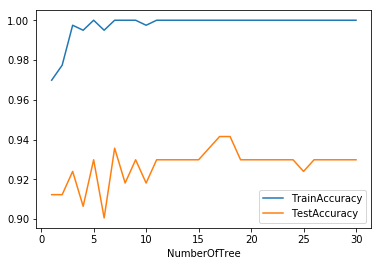

In [78]:
df_accruacy1.set_index("NumberOfTree", inplace=False).plot()

In [79]:
para_criterion = ['gini','entropy']
train_accuracy = []
test_accuracy = []

for criterion in para_criterion:
    rf2 = RandomForestClassifier(criterion=criterion,random_state=1234)
    rf2.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(rf2.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(rf2.score(df_test_x_scaled,df_test_y))
    
df_accruacy2 = pd.DataFrame()
df_accruacy2["Criterion"] = para_criterion
df_accruacy2["TrainAccuracy"] = train_accuracy
df_accruacy2["TestAccuracy"] = test_accuracy
df_accruacy2

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Criterion,TrainAccuracy,TestAccuracy
0,gini,0.997487,0.918129
1,entropy,1.000000,0.912281


In [80]:
para_max_depth = [i+1 for i in range(10)] * 2
n_iter_depth = 10
para_criterion = ['gini']*n_iter_depth + ['entropy']*n_iter_depth
train_accuracy = []
test_accuracy = []

for criterion,depth in zip(para_criterion,para_max_depth):
    rf3 = RandomForestClassifier(criterion=criterion,max_depth=depth,random_state=1234)
    rf3.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(rf3.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(rf3.score(df_test_x_scaled,df_test_y))
    
df_accruacy3 = pd.DataFrame()
df_accruacy3["Criterion"] = para_criterion
df_accruacy3["Depth"] = para_max_depth
df_accruacy3["TrainAccuracy"] = train_accuracy
df_accruacy3["TestAccuracy"] = test_accuracy
df_accruacy3

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/skl

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.952261,0.900585
1,gini,2,0.969849,0.900585
2,gini,3,0.987437,0.894737
3,gini,4,0.997487,0.923977
4,gini,5,1.000000,0.912281
5,gini,6,0.997487,0.918129
6,gini,7,0.997487,0.918129
7,gini,8,0.997487,0.918129
8,gini,9,0.997487,0.918129
9,gini,10,0.997487,0.918129


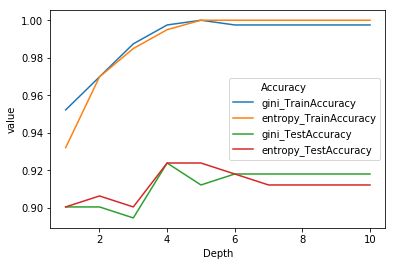

In [81]:
df_accruacy3_melt = pd.melt(df_accruacy3, id_vars=["Criterion","Depth"])
df_accruacy3_melt["Accuracy"] = df_accruacy3_melt["Criterion"] + "_" + df_accruacy3_melt["variable"]
sns.lineplot(x="Depth", y="value", hue="Accuracy", data=df_accruacy3_melt)

In [82]:
train_accuracy = []
test_accuracy = []

n_depth = 4
n_iter_min_leaf_size = 10

para_criterion = ['entropy']*n_iter_min_leaf_size
para_min_leaf_size = [i+1 for i in range(n_iter_min_leaf_size)]

for criterion,leafsize in zip(para_criterion,para_min_leaf_size):
    rf4 = RandomForestClassifier(criterion=criterion,max_depth=n_depth,min_samples_leaf= leafsize,random_state=1234)
    rf4.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(rf4.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(rf4.score(df_test_x_scaled,df_test_y))
    
df_accruacy4 = pd.DataFrame()
df_accruacy4["Criterion"] = para_criterion
df_accruacy4["Depth"] = n_depth
df_accruacy4["MinLeafSize"] = para_min_leaf_size
df_accruacy4["TrainAccuracy"] = train_accuracy
df_accruacy4["TestAccuracy"] = test_accuracy
df_accruacy4

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/skl

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,entropy,4,1,0.994975,0.923977
1,entropy,4,2,0.992462,0.923977
2,entropy,4,3,0.989950,0.923977
3,entropy,4,4,0.989950,0.929825
4,entropy,4,5,0.987437,0.918129
5,entropy,4,6,0.982412,0.906433
6,entropy,4,7,0.984925,0.918129
7,entropy,4,8,0.979899,0.912281
8,entropy,4,9,0.977387,0.912281
9,entropy,4,10,0.974874,0.918129


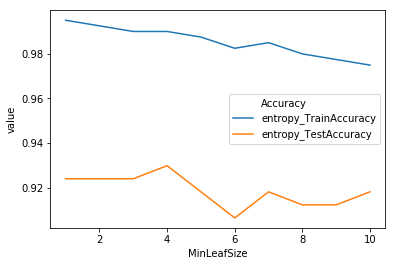

In [83]:
df_accruacy4_melt = pd.melt(df_accruacy4,id_vars=["Criterion","Depth","MinLeafSize"])
df_accruacy4_melt["Accuracy"] = df_accruacy4_melt["Criterion"]+'_'+ df_accruacy4_melt["variable"]
sns.lineplot(x="MinLeafSize", y="value", hue="Accuracy", data=df_accruacy4_melt)

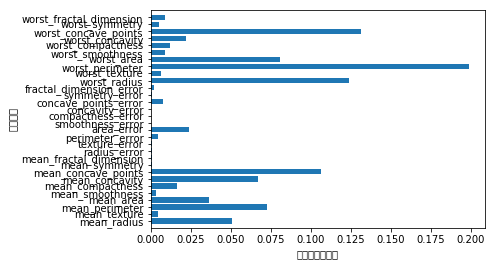

In [84]:
rf_model = RandomForestClassifier(criterion='gini',max_depth=4,min_samples_leaf=10, n_estimators=100,random_state=1234)
rf_model.fit(df_train_x_scaled,df_train_y)

df_feature_importance = pd.DataFrame()
df_feature_importance["feature"] = df_train_x.columns
df_feature_importance["importance"] = rf_model.feature_importances_
df_feature_importance.sort_values(by="importance",ascending=False)

import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = df_train_x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features),df_train_x.columns)
    plt.xlabel("설명변수중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1,n_features)

plot_feature_importances(rf_model)

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini','entropy'],
              'min_samples_split': [i for i in range(2,11)], 
              'min_samples_leaf':[i for i in range(2,11)],
              'max_depth':[i for i in range(2,11)],
              'n_estimators':[i for i in range(5,16)]}
model= RandomForestClassifier()

clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
clf.fit(df_train_x,df_train_y)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [86]:
clf.cv_results_

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/pirl/anaconda3/lib/python3.7/si

{'mean_fit_time': array([0.00545263, 0.00536156, 0.00614314, ..., 0.01378973, 0.01538584,
        0.01604683]),
 'std_fit_time': array([0.0010706 , 0.00011455, 0.00016586, ..., 0.00028054, 0.00080016,
        0.00040058]),
 'mean_score_time': array([0.00107317, 0.00097792, 0.0010422 , ..., 0.00126712, 0.00135152,
        0.00137312]),
 'std_score_time': array([1.96252550e-04, 5.83424439e-06, 3.41378525e-05, ...,
        3.74412904e-05, 7.56940540e-05, 4.75066055e-05]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 2, 2, ..., 10, 10, 10],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[2, 2, 2, ..., 10, 10, 10],
              mask=[False

In [87]:
clf.cv_results_["mean_test_score"].shape

(16038,)

In [88]:
clf.best_params_
# clf.best_estimator_
# clf.best_score_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

In [89]:
from sklearn.metrics import accuracy_score
predictions = clf.predict(df_test_x)
print(accuracy_score(df_test_y, predictions))

0.9239766081871345


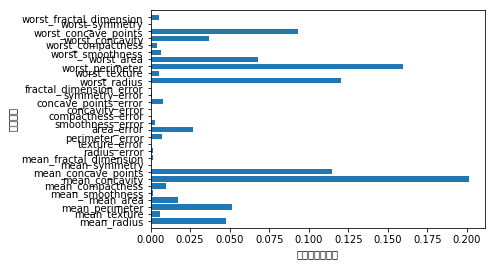

In [35]:
rf_model = RandomForestClassifier(criterion='gini',max_depth=4,min_samples_leaf=10, n_estimators=100,random_state=1234)
rf_model.fit(df_train_x_scaled,df_train_y)

df_feature_importance = pd.DataFrame()
df_feature_importance["feature"] = df_train_x.columns
df_feature_importance["importance"] = rf_model.feature_importances_
df_feature_importance.sort_values(by="importance",ascending=False)

import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = df_train_x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features),df_train_x.columns)
    plt.xlabel("설명변수중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1,n_features)

plot_feature_importances(rf_model)